# Model for content based filtering
This notebook process data to create a ml model.

## Preprocessing data to ML Model

### Loading data from csv

In [202]:
import pandas as pd

df = pd.read_csv("dataset_movies.csv")
df.set_index("id",inplace=True)
df

,budget,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
2,0,Ariel,8.165,10/21/1988,0,73,6.8,157,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,Varjoja paratiisissa,8.509,10/17/1986,0,74,7.2,158,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4000000,Four Rooms,14.441,12/9/1995,4257354,98,5.7,2127,0,0,...,0,0,0,0,0,0,0,0,0,0
6,21000000,Judgment Night,13.336,10/15/1993,12136938,110,6.5,230,1,0,...,0,0,0,0,0,0,0,1,0,0
8,42000,Life in Loops (A Megacities RMX),2.352,1/1/2006,0,80,7.5,18,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285080,0,Scores to Settle,0.699,1/1/1998,0,115,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285081,0,Tödlicher Ausgang,0.600,8/10/1979,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285082,0,Der Regenmacher,0.600,1/1/1980,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Exploratory analysis

In [203]:
df.iloc[:,0:8].describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,1.720930e+05,172093.000000,1.720930e+05,172093.000000,172093.000000,172093.000000
mean,1.178112e+06,3.056086,3.073493e+06,72.748415,4.422056,78.277245
std,9.235509e+06,8.159921,3.366562e+07,126.646499,2.795875,639.400609
min,0.000000e+00,0.600000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.600000,0.000000e+00,28.000000,2.000000,1.000000
50%,0.000000e+00,1.260000,0.000000e+00,86.000000,5.300000,3.000000
75%,0.000000e+00,2.597000,0.000000e+00,99.000000,6.400000,11.000000
max,3.800000e+08,403.432000,2.847246e+09,43200.000000,10.000000,31166.000000


In [217]:
df_partial = df.iloc[:,:8].copy()
df_partial = df_partial.drop(["original_title","release_date"],axis=1)
#df_partial["gain"] = df["revenue"] - df["budget"]
#df_partial = df_partial.drop(["budget","revenue"],axis=1)
df_partial

,budget,popularity,revenue,runtime,vote_average,vote_count
id,,,,,,
2,0,8.165,0,73,6.8,157
3,0,8.509,0,74,7.2,158
5,4000000,14.441,4257354,98,5.7,2127
6,21000000,13.336,12136938,110,6.5,230
8,42000,2.352,0,80,7.5,18
...,...,...,...,...,...,...
285080,0,0.699,0,115,0.0,0
285081,0,0.600,0,0,0.0,0
285082,0,0.600,0,0,0.0,0


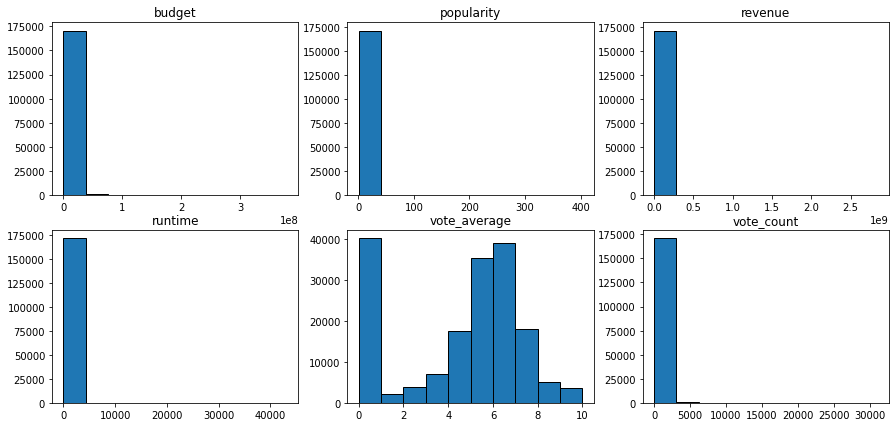

In [218]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.hist(df_partial.iloc[:,i],edgecolor="black")
    plt.title(df_partial.columns[i])
plt.show()

In [219]:
import numpy as np
percentil_vect = np.array(np.percentile(df_partial,99,axis=0),copy=True)
print(percentil_vect)

[3.50000000e+07 3.00324000e+01 7.60772168e+07 1.82000000e+02
 1.00000000e+01 1.62224000e+03]


In [235]:
df_partial.loc[:, "budget"][df_partial.loc[:, "budget"] > 2e4] = 2e4

C:\Users\chccr\AppData\Local\Temp\ipykernel_4984\3529147358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_partial.loc[:, "budget"][df_partial.loc[:, "budget"] > 2e4] = 2e4


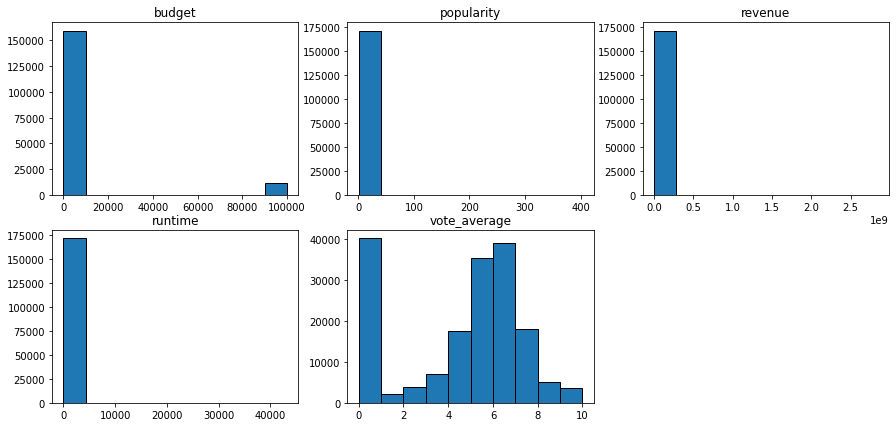

In [234]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.hist(df_partial.iloc[:, i], edgecolor="black")
    plt.title(df_partial.columns[i])
plt.show()

In [190]:
#percentil_vect = np.percentile(df_partial, 99, axis=0)
np.percentile(df_partial, 95, axis=0)
#print(percentil_vect)

array([1.4854782e+06, 1.0237000e+01, 3.3742920e+05, 1.3600000e+02,
       8.0000000e+00, 1.5200000e+02])

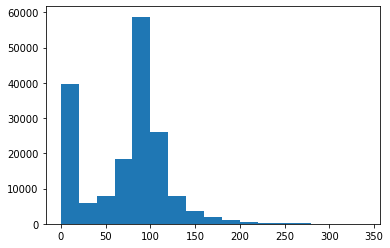

In [108]:
import matplotlib.pyplot as plt
plt.hist(np.array(df["runtime"],dtype="int"),bins=np.arange(0,350,20))
plt.show()

### Drop Dates before 1900
We drop movies before 1900.

In [65]:
import re

def find_1800(date):
    """This function find for "yyyy-mm-dd" or "yyyy-dd-mm" format date.\n
    Return a bool series list where true if are occurence."""
    return bool(re.findall(r"18[0-9]{2}-[0-9]{2}-[0-9]{2}",date))

print("Rows to drop.")
print(df["release_date"][df["release_date"].apply(find_1800)])

Rows to drop.
id
160       1896-01-25
774       1895-03-22
16463     1888-10-14
16464     1888-10-15
16612     1894-03-14
             ...    
282207    1897-01-02
282867    1896-05-26
283448    1898-11-26
283969    1895-01-02
284553    1898-01-02
Name: release_date, Length: 787, dtype: object


In [66]:
drop_index = df["release_date"][df["release_date"].apply(find_1800)].index
df.drop(drop_index, inplace=True)

print("Rows in 'yyyy-mm-dd' format after drop")
print(df["release_date"][df["release_date"].apply(find_1800)])

Rows in 'yyyy-mm-dd' format after drop
Series([], Name: release_date, dtype: object)


### Extracting title and release date column
We will use this dataframe to extract name by id.

In [67]:
titles = df[["original_title","release_date"]]
titles

,original_title,release_date
id,,
2,Ariel,10/21/1988
3,Varjoja paratiisissa,10/17/1986
5,Four Rooms,12/9/1995
6,Judgment Night,10/15/1993
8,Life in Loops (A Megacities RMX),1/1/2006
...,...,...
285080,Scores to Settle,1/1/1998
285081,Tödlicher Ausgang,8/10/1979
285082,Der Regenmacher,1/1/1980


### Eliminate title column from dataframe

In [5]:
df.drop("original_title",axis=1,inplace=True)
df

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
2,0,8.165,10/21/1988,0,73,6.8,157,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,8.509,10/17/1986,0,74,7.2,158,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4000000,14.441,12/9/1995,4257354,98,5.7,2127,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,21000000,13.336,10/15/1993,12136938,110,6.5,230,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,42000,2.352,1/1/2006,0,80,7.5,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285080,0,0.699,1/1/1998,0,115,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285081,0,0.600,8/10/1979,0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285082,0,0.600,1/1/1980,0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Transform date to ordinal

In [6]:
from datetime import datetime

def date_to_ordinal(date):
    """Transform date in format %Y/%m/%d to ordinal date type."""
    if date != "0":
        return datetime.strptime(date, "%m/%d/%Y").toordinal()
    else:
        return 0

#apply method apply function in all element column(s)
#transform method is similar to apply
df["release_date"] = df["release_date"].apply(date_to_ordinal)
df

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
2,0,8.165,726031,0,73,6.8,157,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,8.509,725296,0,74,7.2,158,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4000000,14.441,728636,4257354,98,5.7,2127,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,21000000,13.336,727851,12136938,110,6.5,230,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,42000,2.352,732312,0,80,7.5,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285080,0,0.699,729390,0,115,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285081,0,0.600,722671,0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285082,0,0.600,722815,0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Replacing 0 values to NaN values
In order to use NaN Euclidean Distance, a modified version of euclidean distance, we transform 0 values to np.nan values format using numpy library.

In [8]:
import numpy as np
df.iloc[:,0:7] = df.iloc[:,0:7].replace(0,np.nan)
df

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
2,NaN,8.165,726031.0,NaN,73.0,6.8,157.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,8.509,725296.0,NaN,74.0,7.2,158.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4000000.0,14.441,728636.0,4257354.0,98.0,5.7,2127.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,21000000.0,13.336,727851.0,12136938.0,110.0,6.5,230.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,42000.0,2.352,732312.0,NaN,80.0,7.5,18.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285080,NaN,0.699,729390.0,NaN,115.0,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285081,NaN,0.600,722671.0,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285082,NaN,0.600,722815.0,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Exploratory analysis

In [69]:
from datetime import datetime

def date_to_ordinal(date):
    """Transform date in format %Y/%m/%d to ordinal date type."""
    if date != "0":
        return datetime.strptime(date, "%m/%d/%Y").toordinal()
    else:
        return 0

#apply method apply function in all element column(s)
#transform method is similar to apply
df["release_date"] = df["release_date"].apply(date_to_ordinal)
df

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count
count,1.420100e+04,171306.000000,167566.000000,1.030000e+04,147570.000000,131142.000000,131184.000000
mean,1.427681e+07,3.065095,725888.370672,5.135210e+07,84.831226,5.777407,102.608161
std,2.909774e+07,8.177232,9573.849629,1.282917e+08,132.966898,1.556718,730.637877
min,1.000000e+00,0.600000,693596.000000,1.000000e+00,1.000000,0.500000,1.000000
25%,3.560000e+05,0.600000,720259.000000,1.083611e+06,70.000000,5.000000,2.000000
50%,3.000000e+06,1.267000,729855.500000,8.468576e+06,90.000000,6.000000,6.000000
75%,1.500000e+07,2.605000,733408.000000,4.069455e+07,101.000000,6.700000,17.000000
max,3.800000e+08,403.432000,739966.000000,2.847246e+09,43200.000000,10.000000,31166.000000


### Replacing 0 values to NaN values
In order to use NaN Euclidean Distance, a modified version of euclidean distance, we transform 0 values to np.nan values format using numpy library.

In [70]:
df.iloc[:,0:7] = df.iloc[:,0:7].replace(0,np.nan)
df

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
2,NaN,8.165,726031.0,NaN,73.0,6.8,157.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,8.509,725296.0,NaN,74.0,7.2,158.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4000000.0,14.441,728636.0,4257354.0,98.0,5.7,2127.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,21000000.0,13.336,727851.0,12136938.0,110.0,6.5,230.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,42000.0,2.352,732312.0,NaN,80.0,7.5,18.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285080,NaN,0.699,729390.0,NaN,115.0,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285081,NaN,0.600,722671.0,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285082,NaN,0.600,722815.0,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Normalize data using MinMaxScaler

In [71]:
from sklearn.preprocessing import MinMaxScaler

# Create scaler object (x-mu)/sigma
scaler = MinMaxScaler()
# Just normalize first 7 columns
scaler.fit(df.iloc[:, :7])

#Create new pandas dataframe
df_standard = pd.DataFrame(scaler.transform(df.iloc[:,:7]),columns=df.iloc[:,:7].columns)
df_standard["id"] = df.index
df_standard.set_index("id",inplace=True)

# Concat standar dataframe (first 7 columns) with df[:,7:]
df_standard = pd.concat([df_standard,df.iloc[:,7:]],axis=1)
df_standard

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
2,NaN,0.018780,0.699482,NaN,0.001667,0.663158,0.005006,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,0.019633,0.683632,NaN,0.001690,0.705263,0.005038,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.010526,0.034359,0.755661,0.001495,0.002245,0.547368,0.068218,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.055263,0.031616,0.738732,0.004263,0.002523,0.631579,0.007348,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0.000111,0.004349,0.834936,NaN,0.001829,0.736842,0.000545,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285080,NaN,0.000246,0.771922,NaN,0.002639,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285081,NaN,0.000000,0.627022,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285082,NaN,0.000000,0.630127,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Using Metric to fin top 10 Movies

### Looking for id Movie

In [60]:
from jellyfish import levenshtein_distance

# Looking for similarity names movies
movie_name = "Jurassic Park"

# Calculates distance beetwen movie name and list fo titles
idx = titles["original_title"].apply(
    lambda x: levenshtein_distance(movie_name,x))
idx = idx.sort_values()[:10]    # Sort vector distances and extract first 10
titles.loc[idx.index]           # Show title names

,original_title,release_date
id,,
329,Jurassic Park,6/11/1993
69181,Jurassic Fart,1/1/1996
120846,Jurassic Shark,9/21/2012
166660,Jurassic Attack,2/22/2013
135397,Jurassic World,6/6/2015
53111,Billy The Kid Returns,9/4/1938
13851,Batman: Gotham Knight,7/8/2008
17549,UFC 39: The Warriors Return,9/27/2002
72003,The Dark Knight,7/11/2011


### Using euclidean distance to find similar movies

In [61]:
#from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import nan_euclidean_distances

movie_id = 329 # Movie id to test
print("Selected movie: {} ({})".format(
      titles.loc[movie_id].values[0],
      titles.loc[movie_id].values[1]))
n = 10      # Number of similar movies

# Calculate distances (euclidean distance)
distances = nan_euclidean_distances(
    df_standard.loc[movie_id].values.reshape(1, -1),
    df_standard)
distances = pd.DataFrame(distances,columns=df.index)

# Order values by ascending order
recomendations = distances.iloc[0].sort_values()[1:n+1]

# Get names of movies
top = titles.loc[recomendations.index]
top.columns = ["Title","Release Date"] # Rename columns
top

Selected movie: Batman: The Dark Knight Returns, Part 2 (1/3/2013)


,Title,Release Date
id,,
116162,Killer Ape,12/15/1953
115824,Jungle Jim in the Forbidden Land,3/17/1952
103269,Superman vs. The Elite,6/12/2012
9323,GHOST IN THE SHELL,11/18/1995
11633,アップルシード,4/17/2004
9389,Renaissance,3/16/2006
149,アキラ,7/16/1988
76589,Justice League: Doom,2/28/2012
42376,Earth Star Voyager,1/17/1988


### Extract covers top 10
Function to extract request image object.

In [62]:
def extract_img(movie_id):
    # Api data and movie index example
    api_key = "44f9a7f09387a49408460a6d158e1f44"
    # URL to retrieve movie info
    url = "https://api.themoviedb.org/3/movie/" + \
        str(movie_id) + "?api_key=" + api_key
    # Making a request example
    request_obj = requests.get(url).text
    # Load dictionary with file info from request
    row = json.loads(request_obj)
    # Poster URL
    poster_url = "https://image.tmdb.org/t/p/w500"+str(row.get("poster_path"))
    return requests.get(poster_url)

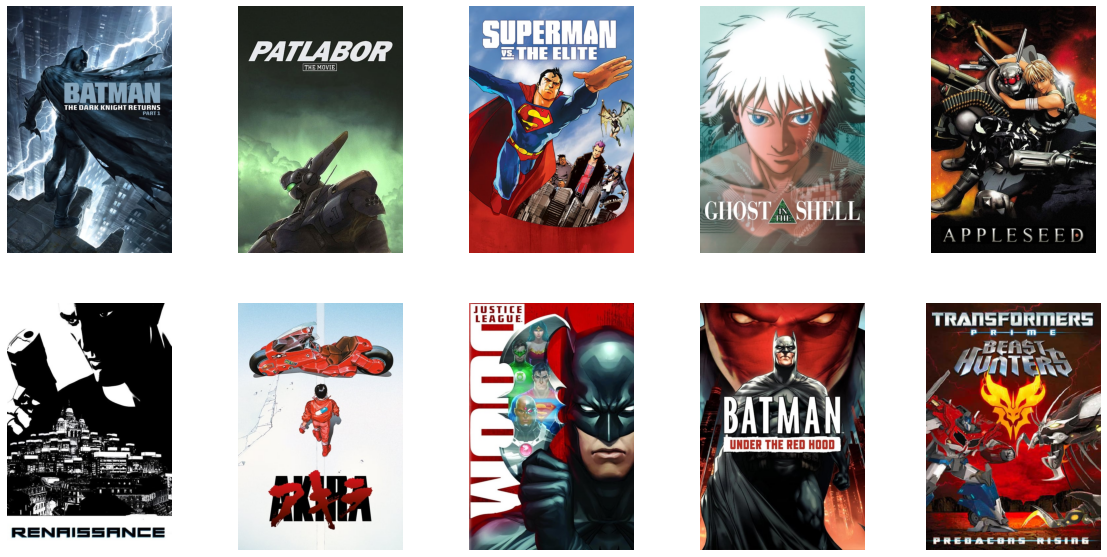

In [63]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from io import BytesIO
import json
import requests

counter = 0
plt.figure(figsize=(20,10))
for movie_idx in top.index:
    poster_img = extract_img(movie_idx)
    if poster_img.status_code == 200:
        imshow = Image.open(BytesIO(poster_img.content))
        plt.subplot(int(np.ceil(n/5)), 5, counter+1)
        plt.axis('off')
        plt.imshow(imshow)
        counter += 1
plt.show()